In [4]:
# função para um DF com header limpo
def rename_header(df):
    #df = data.copy(deep = True)
    new_header = df.columns.str.strip().str.replace(" +"," ").str.lower().str.replace(" ","_")
    df.columns = new_header
    return(df)

# Exercícios - Entrando no ciclo

Chegou o momento de resolvermos alguns problemas utilizando as técnicas de ciência de dados que acumulamos até aqui!

A ideia é que vcs exercitem (idealmente em grupo) a **esteira de um projeto de data science**.

Exercitem a esteira completa (incluindo as etapas de exploração dos dados!), mas deem foco especial para a etapa de modelagem, objetivando a melhoria das **métricas de avaliação** que você(s) julgarem as mais adequadas!

<img src="https://www.abgconsultoria.com.br/blog/wp-content/uploads/img33-768x242.png" width=700>

___

Para cada um dos datasets a seguir (alguns já conhecemos), responda:

- 1 - qual é o problema a ser resolvido?
- 2 - qual é a variável resposta (target?)
- 3 - o problema em questão é um problema de classificação ou regressão?
- 4 - faça EDA dos dados!! Conheça os dados!
- 5 - crie um modelo que proporcione a melhor métrica avaliação (discuta qual métrica faz mais sentido)

Obs:

> utilize os estimadores/hipóteses que conhecemos até um momento;

> se algum integrante do grupo conhecer outros estimadores/hipóteses, o grupo pode usar estas ferramentas **contanto que o integrante que conhece compartilhe com os demais colegas a essência do estimador a ser usado**
_____

In [51]:
from time import sleep

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import statsmodels.formula.api as smf
import scipy as sp
from scipy.stats import probplot

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

____
____
____

### Problema 1: Titanic

Base `titanic.csv` na pasta `/datasets`

1 - qual é o problema a ser resolvido?<br>
> sobrevivência está relacionado a alguma outra variável? Parece estar associada a sexo.<br>

2 - qual é a variável resposta (target?)<br>
> survived<br>

3 - o problema em questão é um problema de classificação ou regressão?<br>
> de classificação<br>

4 - faça EDA dos dados!! Conheça os dados!<br>
> feito<br>

5 - crie um modelo que proporcione a melhor métrica avaliação (discuta qual métrica faz mais sentido)<br>
> in progress<br>

https://github.com/awesomedata/awesome-public-datasets/issues/351

survival - Survival (0 = No; 1 = Yes)<br>
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
name - Name<br>
sex - Sex<br>
age - Age<br>
sibsp - Number of Siblings/Spouses Aboard<br>
parch - Number of Parents/Children Aboard<br>
ticket - Ticket Number<br>
fare - Passenger Fare<br>
cabin - Cabin<br>
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>
boat - Lifeboat (if survived)<br>
body - Body number (if did not survive and body was recovered)<br>

In [2]:
df = pd.read_csv('titanic.csv')

In [5]:
rename_header(df)
df.sample(5)

C:\Users\leaph\AppData\Local\Temp/ipykernel_71876/783863356.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  new_header = df.columns.str.strip().str.replace(" +"," ").str.lower().str.replace(" ","_")


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
896,3,0,"Johnson, Mr. Alfred",male,49,0,0,LINE,0,?,S,?,?,?
1198,3,1,"Shine, Miss. Ellen Natalia",female,?,0,0,330968,7.7792,?,Q,?,?,?
525,2,0,"Pain, Dr. Alfred",male,23,0,0,244278,10.5,?,S,?,?,"Hamilton, ON"
607,3,1,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,?,C,C,?,"Greensburg, PA"
109,1,1,"Flynn, Mr. John Irwin ('Irving')",male,36,0,0,PC 17474,26.3875,E25,S,5,?,"Brooklyn, NY"


In [6]:
df['is_female'] = np.where(df['sex']=='female',1,0)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,is_female
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON",0
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON",0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?,1
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?,0
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?,0


In [7]:
df.drop(columns=['name','ticket','cabin','home.dest','body','boat','sex'], inplace=True)

In [8]:
df = df[['pclass','is_female', 'age', 'sibsp', 'parch','fare','embarked','survived']]

In [9]:
df

,pclass,is_female,age,sibsp,parch,fare,embarked,survived
0,1,1,29,0,0,211.3375,S,1
1,1,0,0.9167,1,2,151.55,S,1
2,1,1,2,1,2,151.55,S,0
3,1,0,30,1,2,151.55,S,0
4,1,1,25,1,2,151.55,S,0
...,...,...,...,...,...,...,...,...
1304,3,1,14.5,1,0,14.4542,C,0
1305,3,1,?,1,0,14.4542,C,0
1306,3,0,26.5,0,0,7.225,C,0
1307,3,0,27,0,0,7.225,C,0


In [10]:
df = df[df != '?']

In [11]:
df['age'] = pd.to_numeric(df['age'])
df['fare'] = pd.to_numeric(df['fare'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   is_female  1309 non-null   int32  
 2   age        1046 non-null   float64
 3   sibsp      1309 non-null   int64  
 4   parch      1309 non-null   int64  
 5   fare       1308 non-null   float64
 6   embarked   1307 non-null   object 
 7   survived   1309 non-null   int64  
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 76.8+ KB


In [13]:
df.describe()

,pclass,is_female,age,sibsp,parch,fare,survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,0.355997,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,0.478997,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000


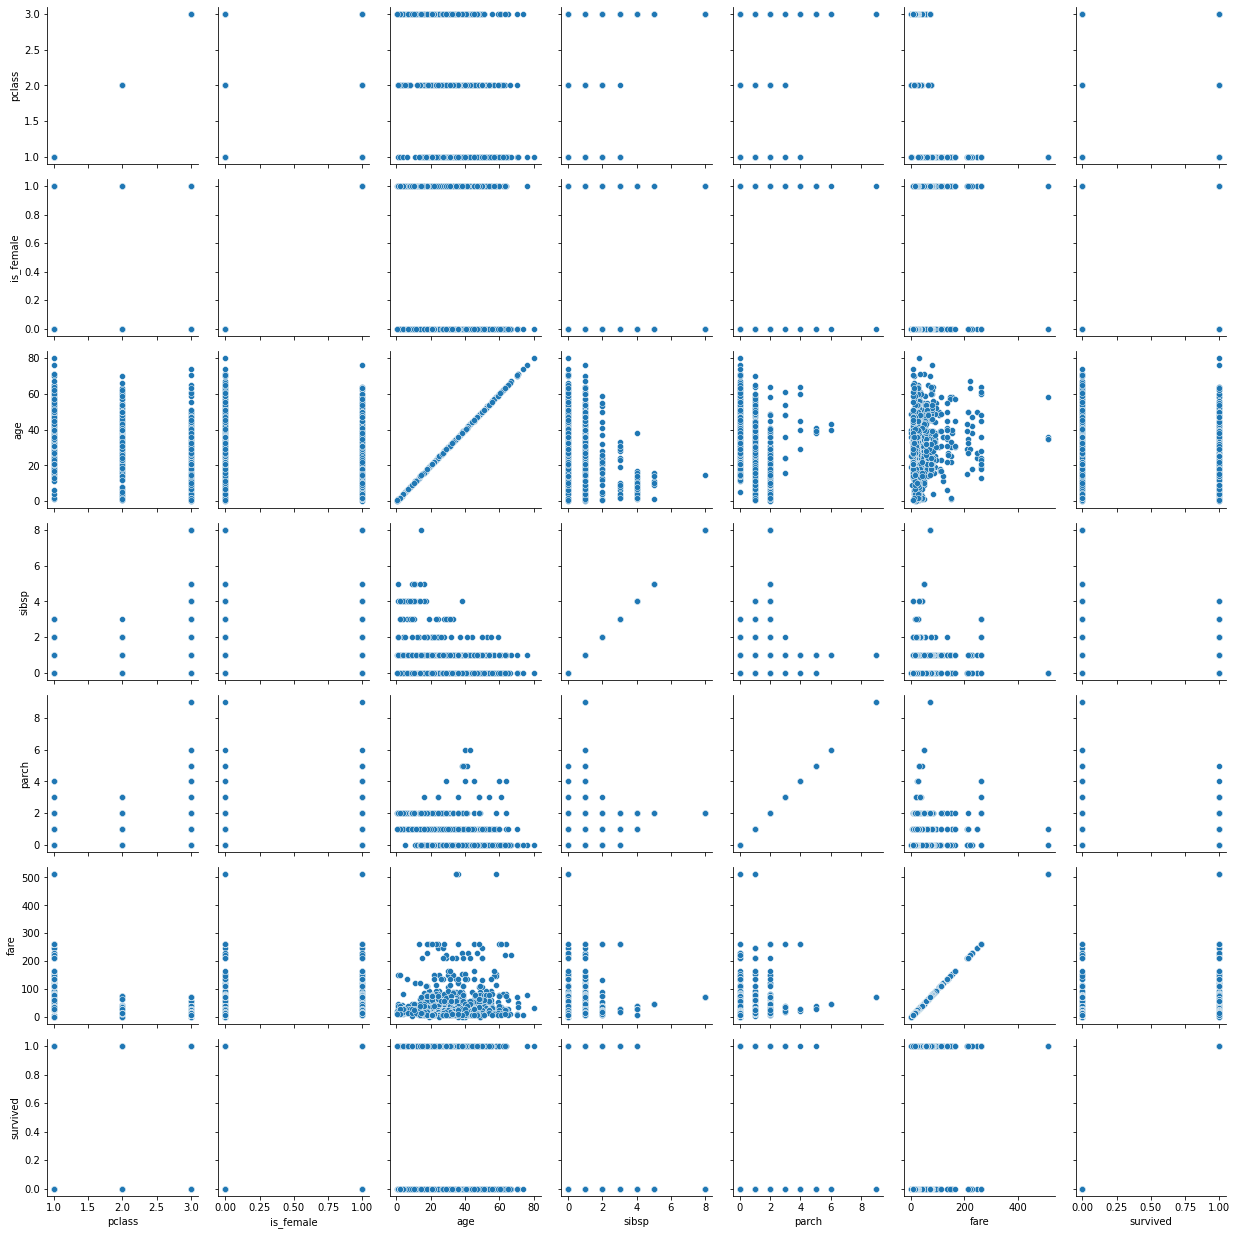

In [14]:
g = sns.PairGrid(df)
g.map(sns.scatterplot);

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U1'), dtype('float64')) -> None

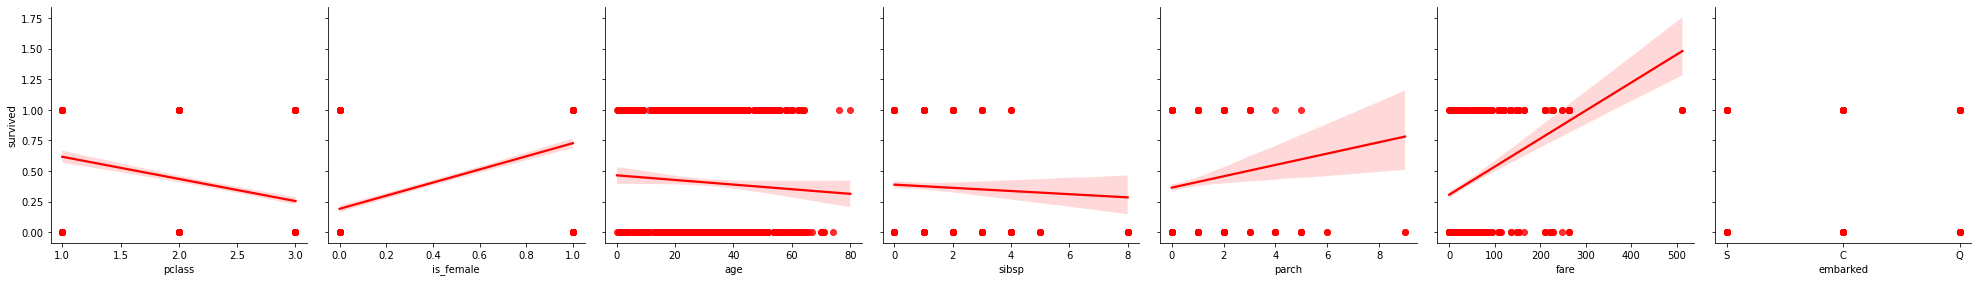

In [15]:
g = sns.PairGrid(df, y_vars=['survived'], x_vars=['pclass',
                                                  'is_female',
                                                  'age',
                                                  'sibsp',
                                                  'parch',
                                                  'fare',
                                                  'embarked'], height=4)
g.map(sns.regplot, color="red");

In [ ]:
df.columns

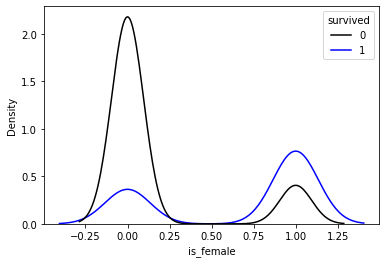

In [16]:
sns.kdeplot(data = df, x = 'is_female', hue='survived', palette=['black','blue']);

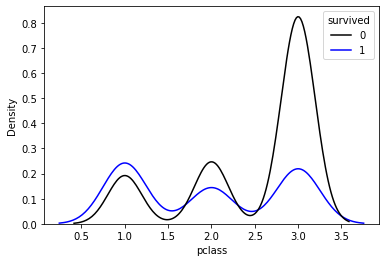

In [17]:
sns.kdeplot(data = df, x = 'pclass', hue='survived', palette=['black','blue']);

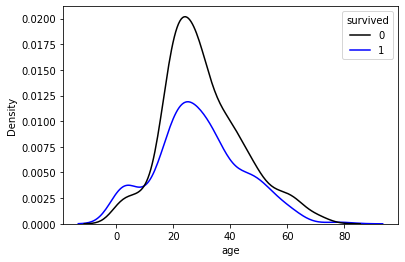

In [18]:
sns.kdeplot(data = df, x = 'age', hue='survived', palette=['black','blue']);

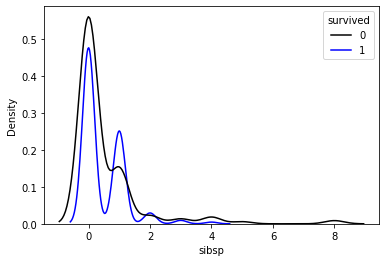

In [19]:
sns.kdeplot(data = df, x = 'sibsp', hue='survived', palette=['black','blue']);

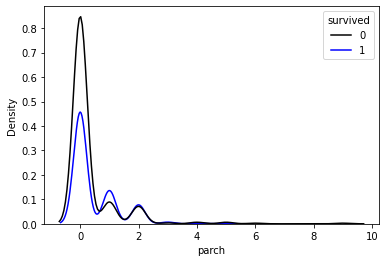

In [20]:
sns.kdeplot(data = df, x = 'parch', hue='survived', palette=['black','blue']);

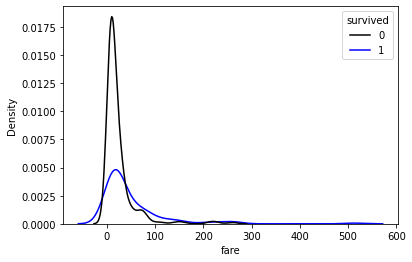

In [21]:
sns.kdeplot(data = df, x = 'fare', hue='survived', palette=['black','blue']);

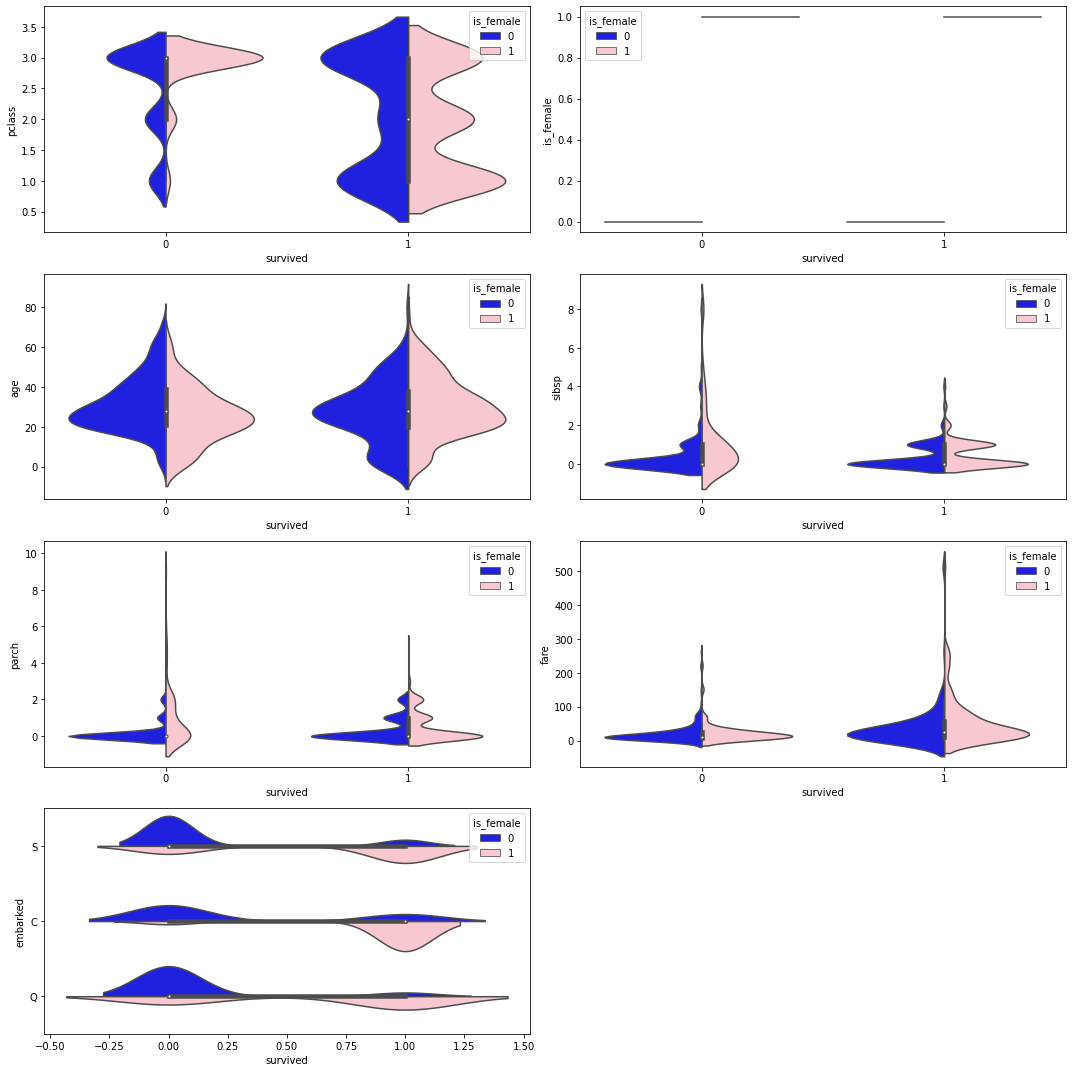

In [22]:
fig, axs = plt.subplots(4,2,figsize=(15,15))
axs = axs.ravel()

for column,ax in zip(df.columns,axs):
    sns.violinplot(data=df,y=column,x='survived',ax=ax, palette=['blue','pink'], hue='is_female', split=True)

fig.delaxes(axs[-1])
plt.tight_layout()

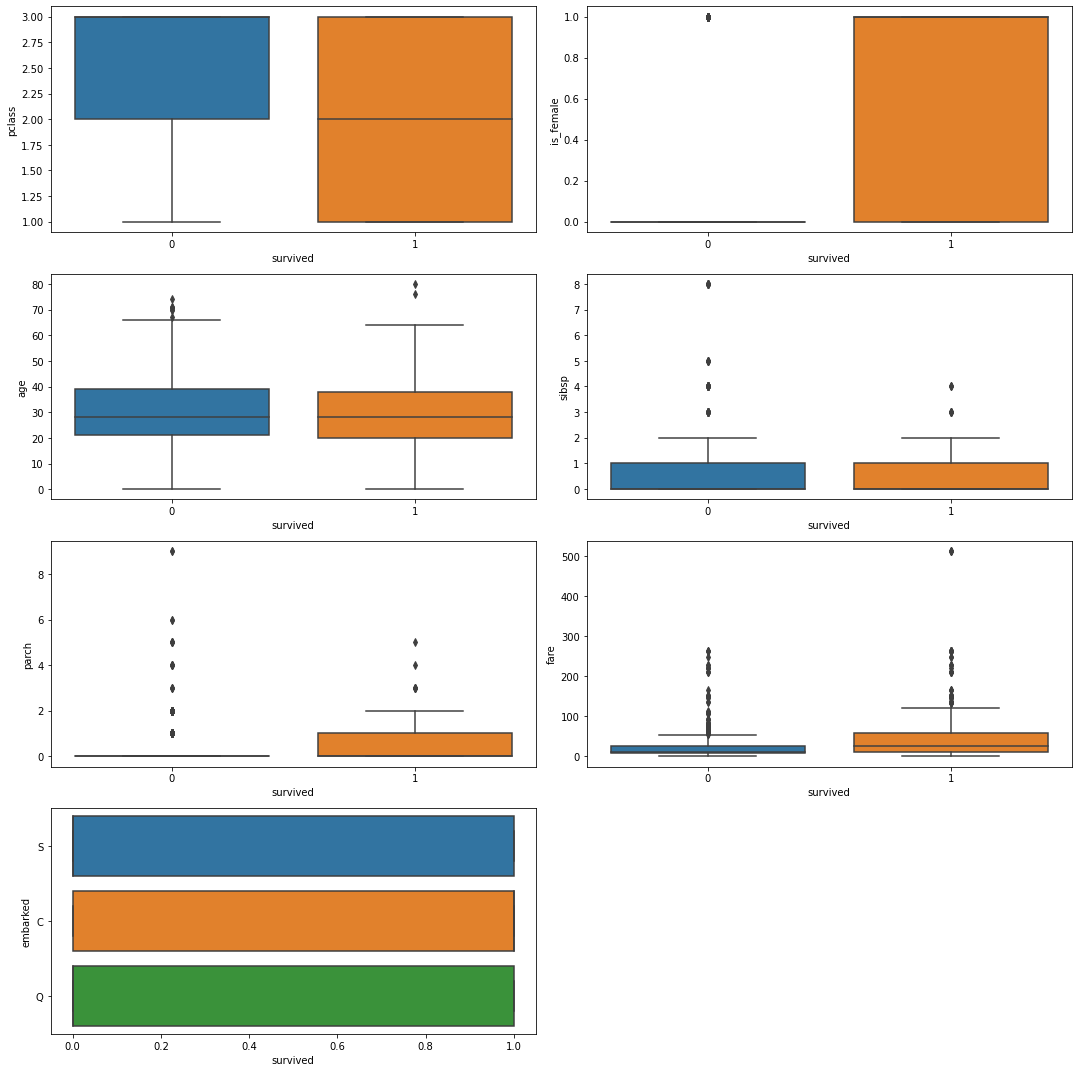

In [23]:
fig, axs = plt.subplots(4,2,figsize=(15,15)) #???
axs = axs.ravel()

for column,ax in zip(df.columns,axs):
    sns.boxplot(data=df,y=column,x='survived',ax=ax)

fig.delaxes(axs[-1])
plt.tight_layout()

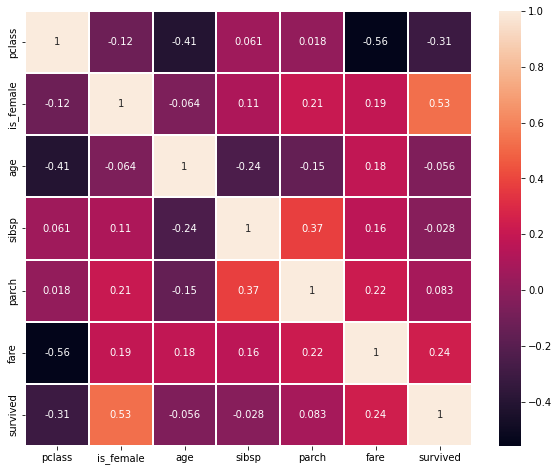

In [24]:
corr = df.append(df, ignore_index=True).corr()
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,linewidths=.2, annot=True)
plt.show()

In [25]:
# Classificação

In [26]:
df.isnull().sum()

pclass         0
is_female      0
age          263
sibsp          0
parch          0
fare           1
embarked       2
survived       0
dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
df.isnull().sum()

pclass       0
is_female    0
age          0
sibsp        0
parch        0
fare         0
embarked     0
survived     0
dtype: int64

In [163]:
y = df[['survived']]
X = df.drop(columns=['embarked', 'survived'])

In [164]:
X

,pclass,is_female,age,sibsp,parch,fare
0,1,1,29.0000,0,0,211.3375
1,1,0,0.9167,1,2,151.5500
2,1,1,2.0000,1,2,151.5500
3,1,0,30.0000,1,2,151.5500
4,1,1,25.0000,1,2,151.5500
...,...,...,...,...,...,...
1301,3,0,45.5000,0,0,7.2250
1304,3,1,14.5000,1,0,14.4542
1306,3,0,26.5000,0,0,7.2250
1307,3,0,27.0000,0,0,7.2250


In [165]:
y

,survived
0,1
1,1
2,0
3,0
4,0
...,...
1301,0
1304,0
1306,0
1307,0


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#mms = MinMaxScaler().fit(X_train)

#X_train =  mms.transform(X_train)

# com o scaler parece que ficou pior

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

C:\Users\leaph\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [167]:
y_pred.shape

(313,)

In [168]:
classifier.predict_proba(X_test).shape

(313, 2)

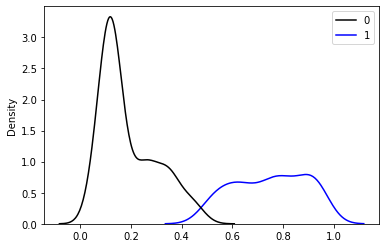

In [169]:
#threshold
sns.kdeplot(classifier.predict_proba(X_test)[:,1], hue = y_pred, palette=['black','blue']);

In [74]:
# Making the Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[171,  33],
       [ 30,  79]], dtype=int64)

In [75]:
# Classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       204
           1       0.71      0.72      0.71       109

    accuracy                           0.80       313
   macro avg       0.78      0.78      0.78       313
weighted avg       0.80      0.80      0.80       313



In [76]:
# ROC
metrics.roc_auc_score(y_test, y_pred)

0.7815029681597409

In [77]:
classifier.intercept_

array([2.08017351])

In [78]:
classifier.coef_

array([[-1.06443833e+00,  2.40289669e+00, -3.52838871e-02,
        -1.33109066e-01,  6.19045120e-02,  1.71780164e-03]])

In [ ]:
# OS GRÁFICOS ABAIXO NÃO FUNCINARAM COM APENAS UMA VARIÁVEL X não entendi o motivo

In [79]:
# usando apenas sexo

In [171]:
y = df[['survived']]
X = df.drop(columns=['pclass','sibsp', 'parch', 'fare', 'embarked',
       'survived'])

In [172]:
X

,is_female,age
0,1,29.0000
1,0,0.9167
2,1,2.0000
3,0,30.0000
4,1,25.0000
...,...,...
1301,0,45.5000
1304,1,14.5000
1306,0,26.5000
1307,0,27.0000


In [173]:
y

,survived
0,1
1,1
2,0
3,0
4,0
...,...
1301,0
1304,0
1306,0
1307,0


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

C:\Users\leaph\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [175]:
y_pred.shape

(313,)

In [176]:
classifier.predict_proba(X_test).shape

(313, 2)

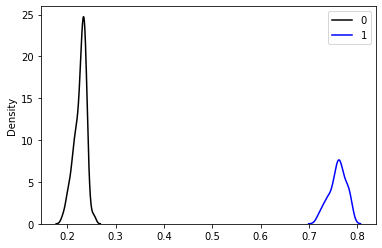

In [177]:
#threshold
sns.kdeplot(classifier.predict_proba(X_test)[:,1], hue = y_pred, palette=['black','blue']);

In [178]:
# Making the Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[174,  30],
       [ 35,  74]], dtype=int64)

In [179]:
# Classification report apenas com SEXO
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       204
           1       0.71      0.68      0.69       109

    accuracy                           0.79       313
   macro avg       0.77      0.77      0.77       313
weighted avg       0.79      0.79      0.79       313



In [ ]:
# nota-se que é possível prever muito bem a sobrevivência de uma pessoa no titanic
# baseando-se apenas em seu sexo (?)

In [79]:
# usando apenas fare e age

In [180]:
y = df[['survived']]
X = df.drop(columns=['pclass', 'sibsp', 'parch', 'is_female', 'embarked',
       'survived'])

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

C:\Users\leaph\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


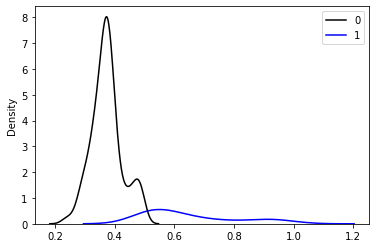

In [188]:
#threshold
sns.kdeplot(classifier.predict_proba(X_test)[:,1], hue = y_pred, palette=['black','blue']); #??? não funcionou

In [189]:
# Making the Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[182,  22],
       [ 77,  32]], dtype=int64)

In [190]:
# Classification report apenas com SEXO
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.89      0.79       204
           1       0.59      0.29      0.39       109

    accuracy                           0.68       313
   macro avg       0.65      0.59      0.59       313
weighted avg       0.66      0.68      0.65       313



### Problema 2 - Tips

Base `tips.csv` na pasta `/datasets`

In [229]:
df = pd.read_csv('tips.csv')

In [230]:
rename_header(df)
df.sample(5)

C:\Users\leaph\AppData\Local\Temp/ipykernel_71876/783863356.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  new_header = df.columns.str.strip().str.replace(" +"," ").str.lower().str.replace(" ","_")


,total_bill,tip,sex,smoker,day,time,size
231,15.69,3.00,Male,Yes,Sat,Dinner,3
110,14.00,3.00,Male,No,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
220,12.16,2.20,Male,Yes,Fri,Lunch,2
31,18.35,2.50,Male,No,Sat,Dinner,4


In [231]:
df['is_female'] = np.where(df['sex']=='Female',1,0)
df['is_smoker'] = np.where(df['smoker']=='Yes',1,0)
df['is_dinner'] = np.where(df['time']=='Dinner',1,0)
df

,total_bill,tip,sex,smoker,day,time,size,is_female,is_smoker,is_dinner
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,1,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,1,1
242,17.82,1.75,Male,No,Sat,Dinner,2,0,0,1


In [232]:
df.drop(columns=['sex','smoker','time'], inplace=True)

In [233]:
df.columns

Index(['total_bill', 'tip', 'day', 'size', 'is_female', 'is_smoker',
       'is_dinner'],
      dtype='object')

In [234]:
df = df[['is_smoker', 'day', 'is_dinner', 'size',
       'is_female', 'total_bill', 'tip']]

In [235]:
df

,is_smoker,day,is_dinner,size,is_female,total_bill,tip
0,0,Sun,1,2,1,16.99,1.01
1,0,Sun,1,3,0,10.34,1.66
2,0,Sun,1,3,0,21.01,3.50
3,0,Sun,1,2,0,23.68,3.31
4,0,Sun,1,4,1,24.59,3.61
...,...,...,...,...,...,...,...
239,0,Sat,1,3,0,29.03,5.92
240,1,Sat,1,2,1,27.18,2.00
241,1,Sat,1,2,0,22.67,2.00
242,0,Sat,1,2,0,17.82,1.75


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   is_smoker   244 non-null    int32  
 1   day         244 non-null    object 
 2   is_dinner   244 non-null    int32  
 3   size        244 non-null    int64  
 4   is_female   244 non-null    int32  
 5   total_bill  244 non-null    float64
 6   tip         244 non-null    float64
dtypes: float64(2), int32(3), int64(1), object(1)
memory usage: 10.6+ KB


In [237]:
df.describe()

,is_smoker,is_dinner,size,is_female,total_bill,tip
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,0.381148,0.721311,2.569672,0.356557,19.785943,2.998279
std,0.486667,0.449276,0.951100,0.479967,8.902412,1.383638
min,0.000000,0.000000,1.000000,0.000000,3.070000,1.000000
25%,0.000000,0.000000,2.000000,0.000000,13.347500,2.000000
50%,0.000000,1.000000,2.000000,0.000000,17.795000,2.900000
75%,1.000000,1.000000,3.000000,1.000000,24.127500,3.562500
max,1.000000,1.000000,6.000000,1.000000,50.810000,10.000000


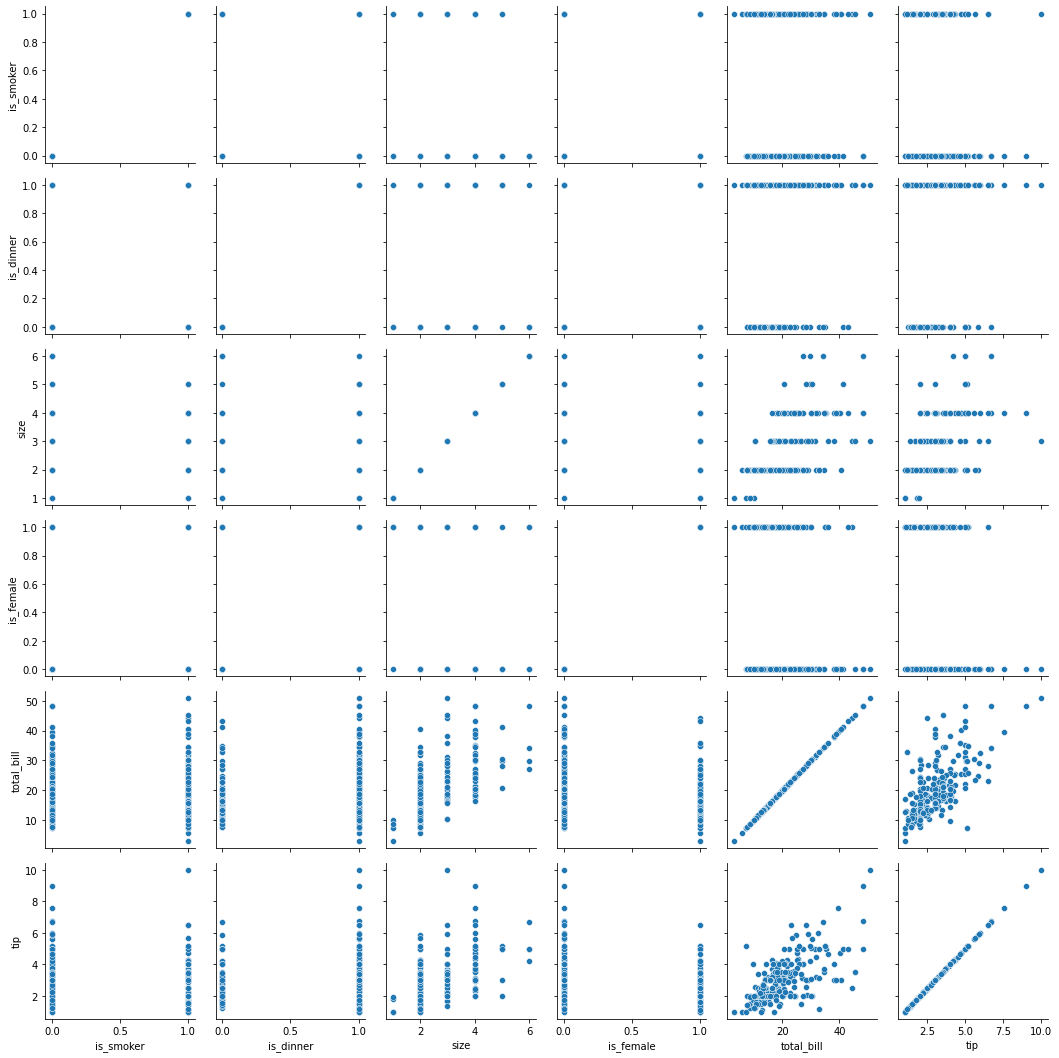

In [238]:
g = sns.PairGrid(df)
g.map(sns.scatterplot);

In [241]:
#g = sns.PairGrid(df, y_vars=['tip'], x_vars=['is_smoker',
                                             'day',
                                             'is_dinner',
                                             'size',
                                             'is_female',
                                             'total_bill'], height=4)
#g.map(sns.regplot, color="red"); não rolou

IndentationError: unexpected indent (Temp/ipykernel_71876/2357170154.py, line 2)

In [242]:
df.columns

Index(['is_smoker', 'day', 'is_dinner', 'size', 'is_female', 'total_bill',
       'tip'],
      dtype='object')

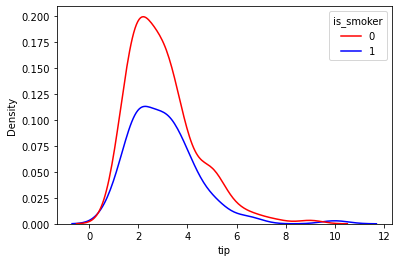

In [243]:
sns.kdeplot(data = df, x = 'tip', hue='is_smoker', palette=['red','blue']);

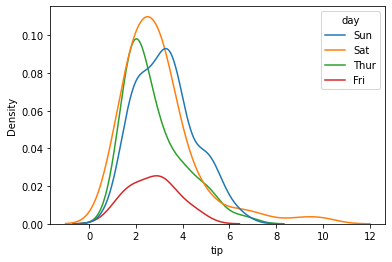

In [245]:
sns.kdeplot(data = df, x = 'tip', hue='day');

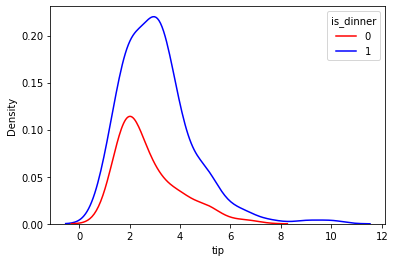

In [246]:
sns.kdeplot(data = df, x = 'tip', hue='is_dinner', palette=['red','blue']);

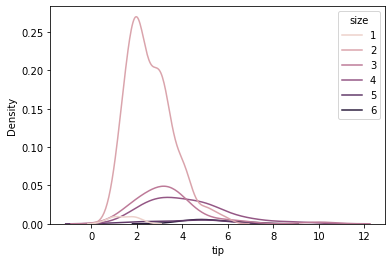

In [247]:
sns.kdeplot(data = df, x = 'tip', hue='size');

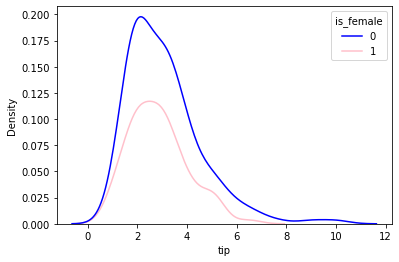

In [252]:
sns.kdeplot(data = df, x = 'tip', hue='is_female', palette=['blue','pink']);

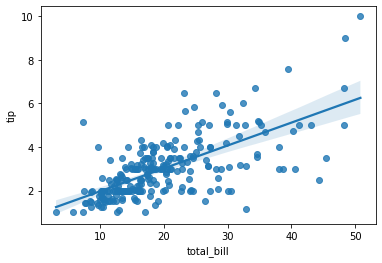

In [256]:
sns.regplot(data = df, y = 'tip', x = 'total_bill');

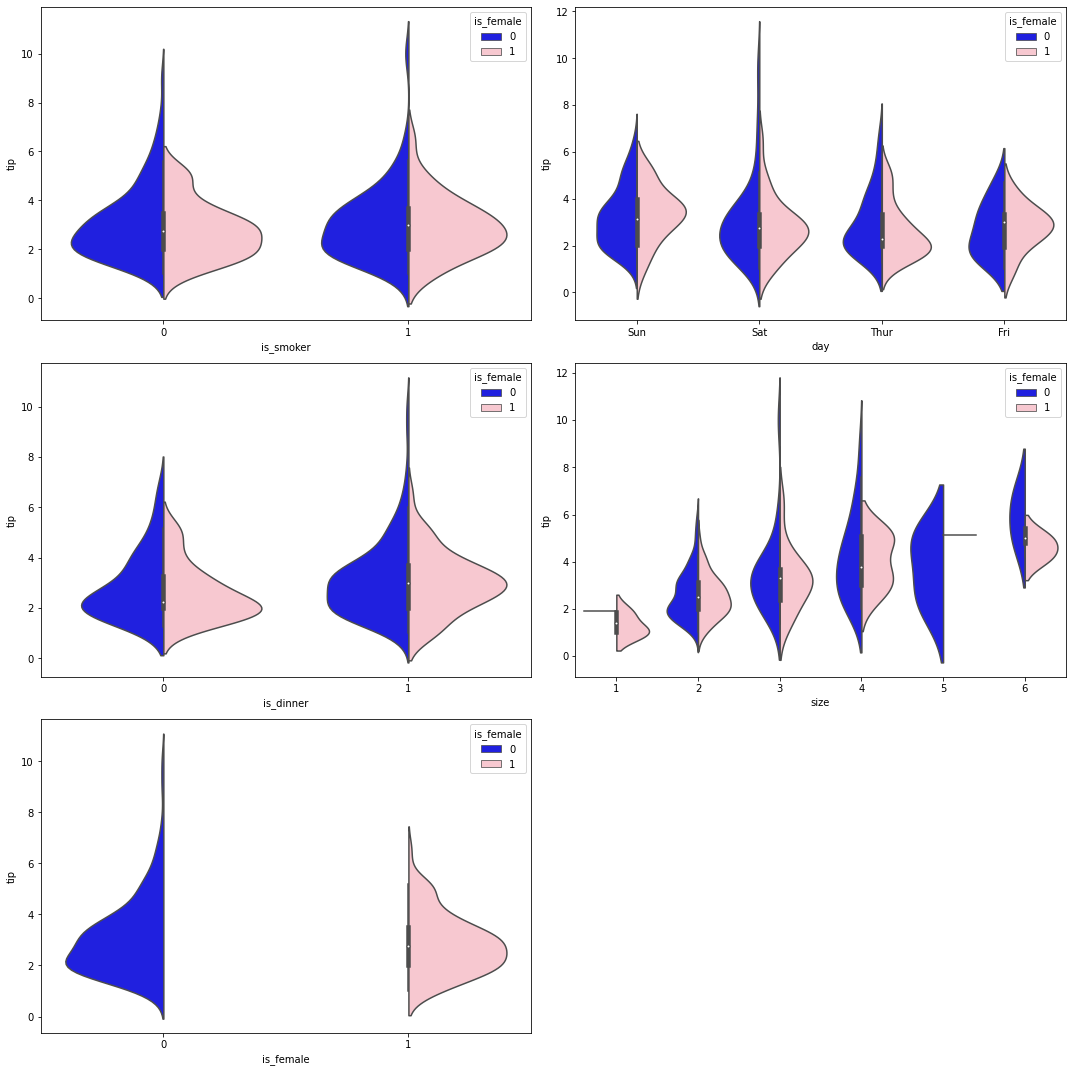

In [262]:
fig, axs = plt.subplots(3,2,figsize=(15,15)) # ignorei as 3 últimas colunas, gráficos não ficam bons
axs = axs.ravel()

for column,ax in zip(df.columns,axs):
    sns.violinplot(data=df,y='tip',x=column,ax=ax, palette=['blue','pink'], hue='is_female', split=True)

fig.delaxes(axs[-1])
plt.tight_layout()

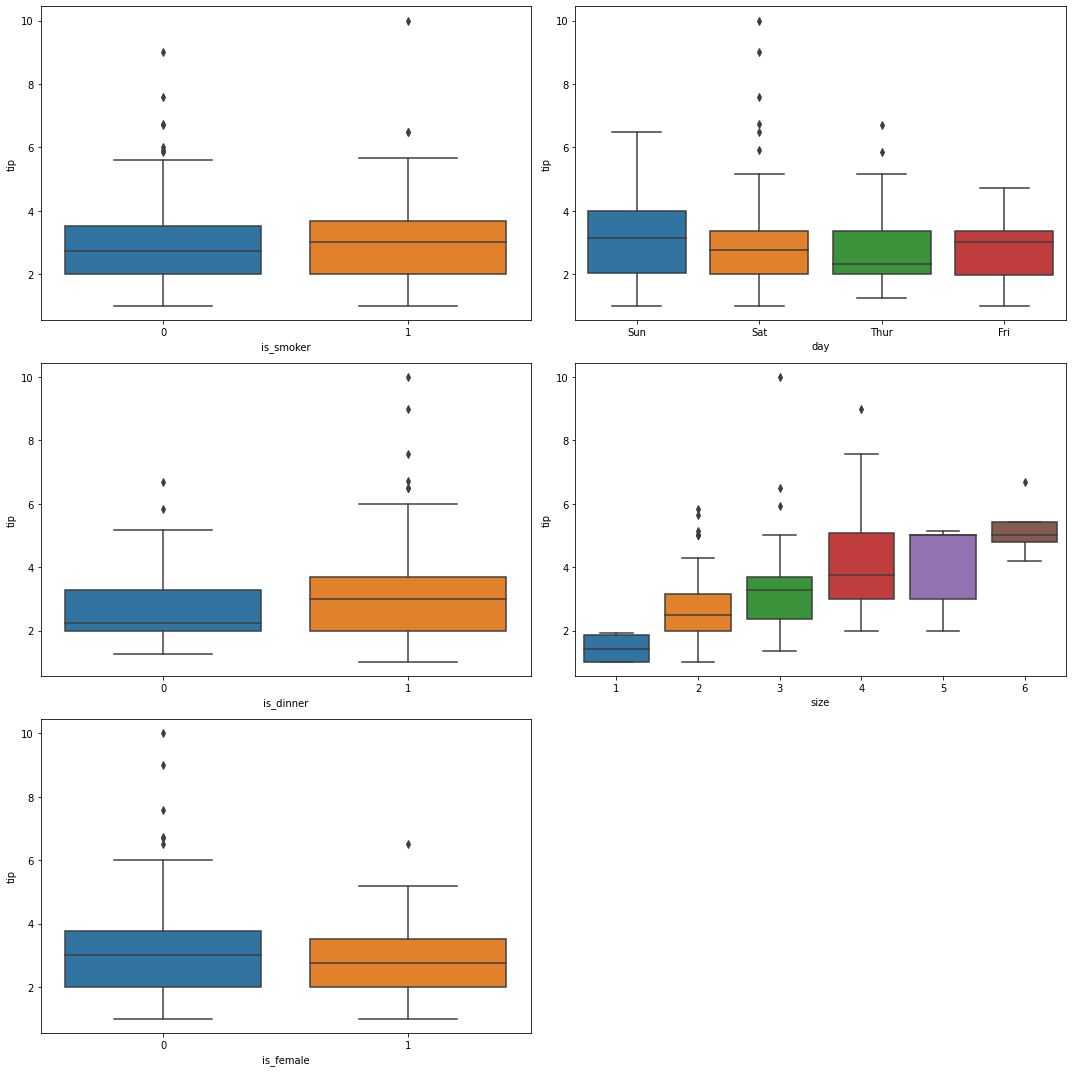

In [264]:
fig, axs = plt.subplots(3,2,figsize=(15,15)) #??? # ignorei as 3 últimas colunas, gráficos não ficam bons
axs = axs.ravel()

for column,ax in zip(df.columns,axs):
    sns.boxplot(data=df,y='tip',x=column,ax=ax)

fig.delaxes(axs[-1])
plt.tight_layout()

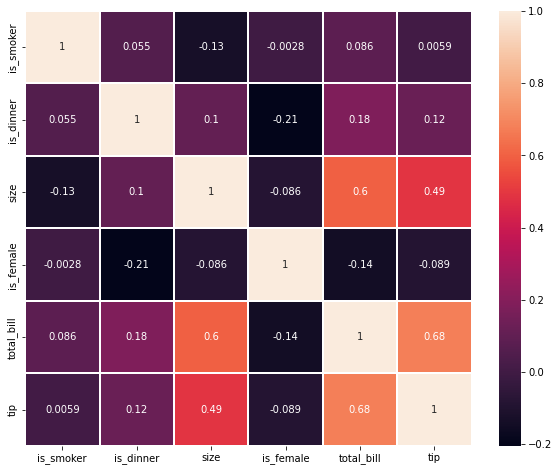

In [265]:
corr = df.append(df, ignore_index=True).corr()
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,linewidths=.2, annot=True)
plt.show()

In [25]:
# Regressão

In [266]:
df.isnull().sum()

is_smoker     0
day           0
is_dinner     0
size          0
is_female     0
total_bill    0
tip           0
dtype: int64

In [272]:
df.columns

Index(['is_smoker', 'day', 'is_dinner', 'size', 'is_female', 'total_bill',
       'tip'],
      dtype='object')

In [276]:
y = df[['tip']]
X = df.drop(columns=['tip','day'])

In [277]:
X

,is_smoker,is_dinner,size,is_female,total_bill
0,0,1,2,1,16.99
1,0,1,3,0,10.34
2,0,1,3,0,21.01
3,0,1,2,0,23.68
4,0,1,4,1,24.59
...,...,...,...,...,...
239,0,1,3,0,29.03
240,1,1,2,1,27.18
241,1,1,2,0,22.67
242,0,1,2,0,17.82


In [278]:
y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#mms = MinMaxScaler().fit(X_train)

#X_train =  mms.transform(X_train)

# com o scaler parece que ficou pior

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [284]:
X_pred = regressor.predict(X_test)

In [294]:
print(r2_score(y_pred, y_test))
print(50*'-')
print(mean_squared_error(y_pred, y_test, squared=False))
print(50*'-')
print(y_pred)

-0.06692364078566548
--------------------------------------------------
0.8959430205432237
--------------------------------------------------
[[2.86490059]
 [3.29184976]
 [3.25209036]
 [4.89671815]
 [2.46444589]
 [1.75567279]
 [3.16146247]
 [3.28588491]
 [2.07114825]
 [2.21275346]
 [5.2258602 ]
 [1.73384732]
 [2.89196105]
 [4.71085664]
 [2.53483805]
 [2.5102442 ]
 [2.74327708]
 [2.70536556]
 [4.69321248]
 [2.22869237]
 [3.18528297]
 [1.77539439]
 [2.22394919]
 [1.98870568]
 [3.41329646]
 [3.0065058 ]
 [2.47139558]
 [5.09151145]
 [2.31092345]
 [2.44472429]
 [3.1039543 ]
 [2.74455061]
 [3.91523834]
 [2.20528964]
 [2.03836496]
 [3.09851606]
 [2.44599782]
 [2.41321454]
 [2.22674812]
 [2.30011279]
 [2.54455288]
 [2.18569299]
 [3.50293222]
 [2.10138858]
 [2.34769464]
 [5.91647501]
 [3.11680862]
 [3.22855444]
 [2.28819556]
 [2.57368666]
 [3.37783083]
 [2.49544151]
 [3.88279149]
 [3.65865705]
 [3.12687238]
 [2.23586641]
 [2.42174041]
 [2.80449909]
 [2.26020212]
 [2.75963376]
 [2.60654824]
 [3.

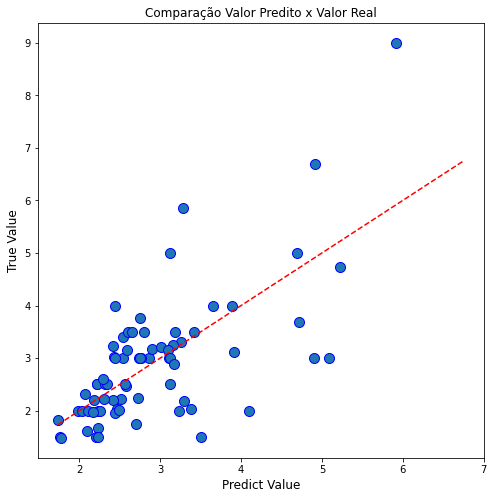

In [296]:
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_pred), 1.2*max(y_pred),(max(y_pred)-min(y_pred))/10)
yl = xl
plt.plot(xl, yl, 'r--');

#plt.axhline(y=y_pred, color = "r")

In [298]:
# erro
residuals = y_test - y_pred #real - predito
print('Resíduos')
print(residuals)

# normalizado
std_residuals = (residuals - residuals.mean())/residuals.std()
print('Resíduos Padronizados')
print(std_residuals)

# média dos resíduos
print('Média Resíduos Padronizados')
print(std_residuals.mean())

# desvio padrão dos resíduos
print('Desvio Padrão para Resíduos Padronizados')
print(std_residuals.std())

Resíduos
          tip
80   0.135099
129 -1.111850
3    0.057910
184 -1.896718
177 -0.464446
..        ...
168 -0.487657
32   0.555997
141  1.790199
210 -2.100322
171  0.571468

[74 rows x 1 columns]
Resíduos Padronizados
          tip
80   0.159134
129 -1.223265
3    0.073559
184 -2.093389
177 -0.505537
..        ...
168 -0.531269
32   0.625751
141  1.994018
210 -2.319110
171  0.642903

[74 rows x 1 columns]
Média Resíduos Padronizados
tip   -3.000603e-17
dtype: float64
Desvio Padrão para Resíduos Padronizados
tip    1.0
dtype: float64


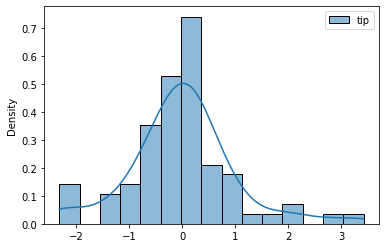

In [299]:
#hist
sns.histplot(std_residuals, kde = True, stat = "density");

In [300]:
#probplot
std_residuals = np.array(std_residuals)
std_residuals

array([[ 0.15913378],
       [-1.22326458],
       [ 0.07355932],
       [-2.09338889],
       [-0.50553681],
       [-0.27408584],
       [ 0.10751415],
       [ 2.85200001],
       [ 0.27415617],
       [ 0.32780782],
       [-0.54036348],
       [ 0.11595649],
       [ 0.3286863 ],
       [-1.13347362],
       [ 0.96849898],
       [-0.3013263 ],
       [ 0.29396858],
       [-1.04978236],
       [ 0.34947143],
       [-0.59893451],
       [ 0.35826228],
       [-0.31812217],
       [ 0.31539596],
       [ 0.02188044],
       [ 0.10548094],
       [ 0.23495792],
       [-0.47998267],
       [-2.3093415 ],
       [ 0.21897416],
       [ 1.73357598],
       [-0.10588701],
       [ 1.13511131],
       [-0.87226141],
       [-0.77254208],
       [-0.03317306],
       [ 0.06643562],
       [-0.52942981],
       [-0.22701558],
       [-0.24201924],
       [-0.06836948],
       [ 0.51427909],
       [ 0.02522037],
       [-2.2111404 ],
       [-0.10304259],
       [ 0.17820873],
       [ 3

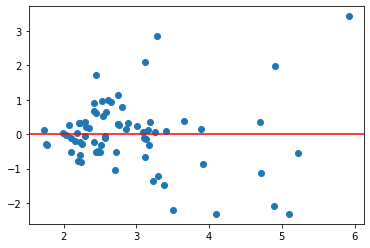

In [302]:

#scatter e line
plt.scatter(y_pred, std_residuals)
plt.axhline(y=0, color = "r");

In [ ]:
# tentando polinomial

In [332]:
y = df[['tip']]
X = df.drop(columns=['tip','day'])

In [333]:
X

,is_smoker,is_dinner,size,is_female,total_bill
0,0,1,2,1,16.99
1,0,1,3,0,10.34
2,0,1,3,0,21.01
3,0,1,2,0,23.68
4,0,1,4,1,24.59
...,...,...,...,...,...
239,0,1,3,0,29.03
240,1,1,2,1,27.18
241,1,1,2,0,22.67
242,0,1,2,0,17.82


In [334]:
y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [335]:
#mms = MinMaxScaler().fit(X_train)

#X_train =  mms.transform(X_train)

# com o scaler parece que ficou pior

# define a transformação nos dados
tranformer = PolynomialFeatures(degree = 2, include_bias=False)
#X = X.reshape((-1,1))

tranformer.fit(X)

# transforma os dados incluindo uma nova coluna com valores quadráticos
X = tranformer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [336]:
X_pred = regressor.predict(X_test)

In [337]:
print(r2_score(y_pred, y_test))
print(50*'-')
print(mean_squared_error(y_pred, y_test, squared=False))
print(50*'-')
print(y_pred)

0.13889913256200392
--------------------------------------------------
0.8329225846732862
--------------------------------------------------
[[2.91184833]
 [3.50082329]
 [3.62634485]
 [4.77671205]
 [2.48863135]
 [1.46622429]
 [3.23017647]
 [3.68552468]
 [1.82833067]
 [2.0519496 ]
 [4.43618033]
 [1.06187   ]
 [3.05091203]
 [4.07322747]
 [2.49468052]
 [2.3647174 ]
 [2.80608366]
 [2.76523333]
 [4.85946697]
 [2.01016953]
 [3.30938062]
 [1.43077645]
 [2.06750161]
 [2.63299238]
 [3.39921138]
 [2.87328301]
 [2.40040529]
 [4.33524429]
 [2.16633763]
 [2.66758463]
 [3.38440007]
 [2.82451962]
 [3.99743195]
 [2.04159862]
 [1.78472565]
 [3.19315571]
 [2.3822821 ]
 [2.24464318]
 [2.0713944 ]
 [2.60833471]
 [2.71146971]
 [2.44626773]
 [3.72542896]
 [2.53525586]
 [2.62726537]
 [6.99501023]
 [3.40646583]
 [3.05159573]
 [2.09332626]
 [2.44447222]
 [3.17824698]
 [2.64460104]
 [4.06164514]
 [3.43127727]
 [3.08545584]
 [2.34796606]
 [2.3473077 ]
 [2.8324137 ]
 [2.73516827]
 [2.96469183]
 [2.48399113]
 [3.0

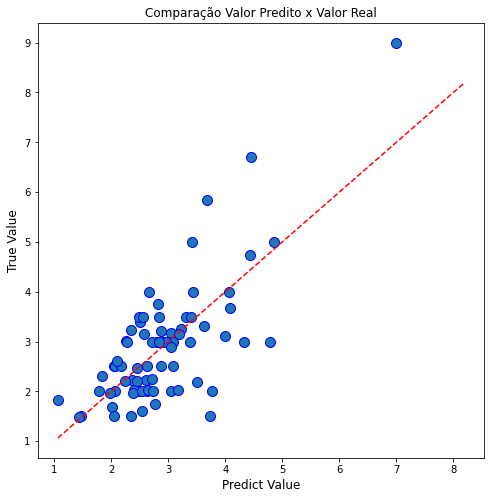

In [338]:
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_pred), 1.2*max(y_pred),(max(y_pred)-min(y_pred))/10)
yl = xl
plt.plot(xl, yl, 'r--');

#plt.axhline(y=y_pred, color = "r")

In [339]:
# erro
residuals = y_test - y_pred #real - predito
print('Resíduos')
print(residuals)

# normalizado
std_residuals = (residuals - residuals.mean())/residuals.std()
print('Resíduos Padronizados')
print(std_residuals)

# média dos resíduos
print('Média Resíduos Padronizados')
print(std_residuals.mean())

# desvio padrão dos resíduos
print('Desvio Padrão para Resíduos Padronizados')
print(std_residuals.std())

Resíduos
          tip
80   0.088152
129 -1.320823
3   -0.316345
184 -1.776712
177 -0.488631
..        ...
168 -0.923976
32   0.717506
141  2.251947
210 -1.774478
171  0.589657

[74 rows x 1 columns]
Resíduos Padronizados
          tip
80   0.108742
129 -1.571404
3   -0.373604
184 -2.115034
177 -0.579049
..        ...
168 -1.098180
32   0.859221
141  2.688982
210 -2.112370
171  0.706767

[74 rows x 1 columns]
Média Resíduos Padronizados
tip   -1.500301e-17
dtype: float64
Desvio Padrão para Resíduos Padronizados
tip    1.0
dtype: float64


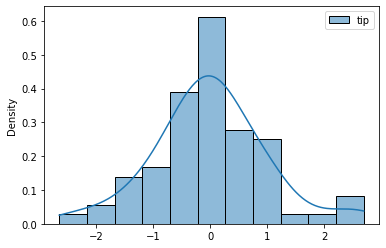

In [340]:
#hist
sns.histplot(std_residuals, kde = True, stat = "density");

In [341]:
#probplot
std_residuals = np.array(std_residuals)
std_residuals

array([[ 0.10874189],
       [-1.5714044 ],
       [-0.37360403],
       [-2.11503352],
       [-0.57904879],
       [ 0.04390074],
       [ 0.02726332],
       [ 2.58467481],
       [ 0.57799597],
       [ 0.53790674],
       [ 0.35399276],
       [ 0.91958885],
       [ 0.15755679],
       [-0.46528348],
       [ 1.08318182],
       [-0.15702056],
       [ 0.23486204],
       [-1.20700059],
       [ 0.17120457],
       [-0.39008941],
       [ 0.23093054],
       [ 0.06232166],
       [ 0.51936159],
       [-0.75119355],
       [ 0.12381095],
       [ 0.4051461 ],
       [-0.43806894],
       [-1.58860087],
       [ 0.40150359],
       [ 1.59247659],
       [-0.45475717],
       [ 1.1191475 ],
       [-1.04267796],
       [-0.64221014],
       [ 0.26033061],
       [-0.04783691],
       [-0.49992996],
       [-0.04961065],
       [-0.08151041],
       [-0.44752446],
       [ 0.34768538],
       [-0.29003987],
       [-2.65011049],
       [-0.63464666],
       [-0.14813431],
       [ 2

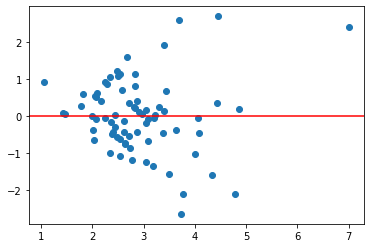

In [342]:

#scatter e line
plt.scatter(y_pred, std_residuals)
plt.axhline(y=0, color = "r");

___
___
___

### Problema 3: house prices

Base `house_prices.csv` na pasta `/datasets`

___
___
___

### Problema 4 - Iris

Base `iris.csv` na pasta `/datasets`

___
___
___

### Problema 5 - breast cancer

Base `breast_cancer.csv` na pasta `/datasets`

___
___
___

### Problema 6 - VOCÊ ESCOLHE!

Entre no [Kaggle](https://www.kaggle.com/), ou consiga dados **supervisionados** (com o target desejado) em qualquer outra fonte, e faça o que fizemos acima!

___
___
___